# METODO DI BISEZIONE
Il metodo di bisezione è un metodo per calcolare il valore approssimato di uno zero di una funzione (ovvero dell'intersezione della funzione con l'asse x, nonchè l'equazione f(x) = 0) in un dato intervallo I. Questo metodo sfrutta il teorema dell'esistenza degli zeri. Ciò tuttavia è anche uno svantaggio in quanto obbliga ad avere gli estremi della funzione discordi tra loro. In caso contrario l'intersezione può comunque esserci, ma questo metodo non riesce a trovarne il valore.

### LIBRERIE IMPORTATE

In [1]:
from math import ceil, floor, e, log
from matplotlib import pyplot as plt
import numpy as np

### LA FUNZIONE BISEZIONE

In [2]:
def bisezione(f, intervallo, precisione=0.01, **kwargs):
    """
    funzione di bisezione che serve a trovare il valore approssimato dello zero di una funzione in un dato 
    intervallo.

    PARAMETRI:
        f: funzione che rappresenta una funzione matematica, quindi che abbina ad un input x un output y
        intervallo: l'intervallo in cui cercare l'intersezione. Perchè il metodo funzioni gli estremi devono esser
                    discordi
        precisione: fino a che cifra (decimale o no) deve approssimare     
    """
    precisione = precisione*0.1
    #estremi dell'intervallo
    a = float(intervallo[0])
    b = float(intervallo[1])

    #----------------------------------------------------------------------------------
    #1)controllando la precisione
    a_digits = [*str(a)]  #--> ["-", "0",".","9","9"]
    b_digits = [*str(b)]

    if a_digits[0] == '-':
        a_digits.remove('-')
    if b_digits[0] == '-':
        b_digits.remove('-')



    #controllo cifra per cifra
    #variabili usate per calcolare la precisione attuale (ovvero fino a che cifra i 2 estremi sono uguali)
    #precisione = ints/10^exp
    exp = 0
    ints = 10**(a_digits.index('.')-1)		#questa variabile è 10 elevato per il numero di cifre prima della 
                                            #virgola. Serve dopo per calcolare la precisione

    #i seguenti 2 valori sono l'index a cui il punto . è posizionato e che equivale al numero di cifre prima della
    #virgola
    index_a = a_digits.index('.')
    index_b = b_digits.index('.') 

    #se i due numeri non hanno lo stesso numero di cifre allora non si calcolerà la precisione
    if index_a - index_b!= 0:
        if index_a > index_b:
            ints = 10**(index_b-1)
        else:
            ints = 10**(index_a-1)
        
    else:
        t = len(a_digits) if len(a_digits) <= len(b_digits) else len(b_digits)
        for i in range(t):
            if a_digits[i] == '.':
                continue

                
            elif a_digits[i] == b_digits[i]:
                exp += 1
                continue
            else:
                break

        #calcolo precisione e nel caso sia corrispondente a quella data, ritorna il risultato
        prec = ints / (10**exp)
        if (prec <= precisione):
            a = ceil(a * 1/precisione) * precisione
            b = floor(a * 1/precisione) * precisione
            return [a,b]
    #------------------------------------------------------------------------------------

    #2)calcolo dell'insieme giusto
    punto_medio = (a + b)/2
    #print(punto_medio)

    #se sono discordi, ovvero c'è un intersezione in quell'intervallo
    if f(a, **kwargs) * f(punto_medio, **kwargs) < 0.0:

        return bisezione(f=f, precisione=precisione, intervallo=[a, punto_medio], **kwargs)

    elif f(a, **kwargs) * f(punto_medio, **kwargs) == 0.0:
        if f(a, **kwargs) == 0.0:
            return a
        else:
            return punto_medio

    #altrimenti controllo con l'altro caso
    elif f(punto_medio, **kwargs) * f(b, **kwargs) < 0.0:
        return bisezione(f=f, precisione=precisione, intervallo=[punto_medio, b], **kwargs)

    #se fa 0 allora vuol dire che funzione(b) fa 0 (non l'altro se no sarebbe andato nel 2 caso)
    elif f(punto_medio, **kwargs) * f(b, **kwargs) == 0.0:
        return b

    #se nessuno dei due sottointervalli ha le condizioni necessarie per il teorema degli zeri e nemmeno gli estremi
    #e il punto medio sono le soluzioni
    else:
        print("Nell'intervallo passato non ci sono intersezioni oppure l'algoritmo non è in grado di trovarne alcuna")
        a = ceil(a * 1/precisione) * precisione
        b = floor(a * 1/precisione) * precisione
        return None


### FUNZIONI MATEMATICHE

In [3]:
"""def retta(x, m=1, q=0):
    return m*x + q

def x_quadro(x, a=1, b=0, c=0):
    return a*x**2 + b*x + c

def iperbole(x, a=0, b=1, c=1, d=0):
    if c*x +d == 0:
        x += 0.01
    
    return (a*x + b)/(c*x + d)

def potenza(x, exp=1, a=1, q=0):
    return a*x**exp + q

def esponenziale_traslata(x): 
    return e**x -2"""

def retta(x):
    return x

def x3_traslata(x):
    if type(x) == int:
        return x**3 - 4
    elif type(x) == list or type(x) == type(np.array([])):
        result = []
        for item in x:
            result.append(item**3 - 4)
        return result

def ln_traslato(x):
    if type(x) == int:
        return log(x+6)
    elif type(x) == list or type(x) == type(np.array([])):
        result = []
        for item in x:
            result.append(log(item+6))
        return result   

def iperbole(x):
    return (3*x + 1)/(4*x + 4)

In [4]:
bisezione(f=iperbole, intervallo=[-0.99, 0], precisione=0.001)

[-0.336, -0.336]

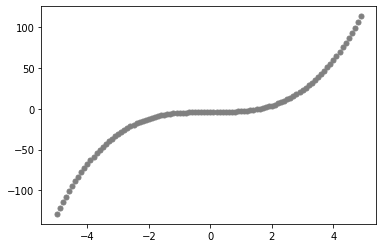

In [32]:
x = np.arange(-5,5,0.1)
y = x3_traslata(x)
result = zip(x,y)
for item in tuple(result):
    plt.scatter(item[0], item[1], s=25, c='gray')

plt.show()